In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

17.52854122670226 99.49427305505867
12.483036285459306 -104.85859872302717
87.18465224945803 -119.88057408239149
-52.055539996745296 -167.58501705838054
-20.086072218329733 6.184228351127359
12.651983526045612 118.9239741525002
79.48429049785727 177.2725175078951
21.176908204457618 63.098080798131605
44.66560733847737 -80.9399515897625
34.90187588833666 126.4449180666141
-78.6224586413328 38.56717273789954
-9.836384654576335 7.881418186478641
-19.088430072418262 4.164534343291905
33.148887343984086 -130.8609156420555
85.82765926562377 150.2878420804591
81.98389229036064 -43.07030642835008
-11.89203169583135 -86.20660589886788
-23.563917178201336 11.591300941892513
-44.80020052718111 -135.32364153649328
4.750167406196368 88.11972144058768
58.56875999589826 -46.58223158321135
53.12396353169174 158.36782613016703
36.41748379131599 -34.736443256731974
56.32323718531018 68.94290643207992
-47.13969575228343 -65.13057859905724
80.99079009687415 44.938720148166084
-26.938908807798676 34.967798

In [5]:
from citipy import citipy

In [6]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
len(cities)       

636

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
 # Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | si satchanalai
Processing Record 2 of Set 1 | lazaro cardenas
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | namibe
Processing Record 6 of Set 1 | buluang
Processing Record 7 of Set 1 | leningradskiy
Processing Record 8 of Set 1 | sur
Processing Record 9 of Set 1 | owen sound
Processing Record 10 of Set 1 | seoul
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | luanda
Processing Record 13 of Set 1 | half moon bay
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | chicama
Processing Record 17 of Set 1 | walvis bay
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | kalmunai
Processing Record 20 of Set 1 | nanortalik
Processing Record 21 of Set 1 | yelizovo
Processing Record 22 of Set 1 | ribeira grande
Processing Record 23 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Si Satchanalai,17.5169,99.7598,76.93,85,98,0.98,TH,2022-06-20 22:50:04
1,Lazaro Cardenas,17.9583,-102.2000,84.11,69,95,7.45,MX,2022-06-20 22:49:08
2,Tuktoyaktuk,69.4541,-133.0374,35.60,87,40,12.66,CA,2022-06-20 22:50:05
3,Vaini,-21.2000,-175.2000,80.76,83,20,12.66,TO,2022-06-20 22:50:05
4,Namibe,-15.1961,12.1522,59.81,76,0,9.13,AO,2022-06-20 22:50:05
...,...,...,...,...,...,...,...,...,...
583,Muravlenko,63.7898,74.5230,66.22,62,60,12.86,RU,2022-06-20 23:05:23
584,North Platte,41.1239,-100.7654,97.38,21,0,23.00,US,2022-06-20 23:04:04
585,Odweyne,9.4092,45.0640,75.15,43,33,17.83,SO,2022-06-20 23:05:24
586,Quimper,48.0000,-4.1000,61.38,88,82,10.36,FR,2022-06-20 23:05:24


In [12]:
new_column_order = ["City", "Country", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Si Satchanalai,TH,17.5169,99.7598,76.93,85,98,0.98
1,Lazaro Cardenas,MX,17.9583,-102.2000,84.11,69,95,7.45
2,Tuktoyaktuk,CA,69.4541,-133.0374,35.60,87,40,12.66
3,Vaini,TO,-21.2000,-175.2000,80.76,83,20,12.66
4,Namibe,AO,-15.1961,12.1522,59.81,76,0,9.13
...,...,...,...,...,...,...,...,...
583,Muravlenko,RU,63.7898,74.5230,66.22,62,60,12.86
584,North Platte,US,41.1239,-100.7654,97.38,21,0,23.00
585,Odweyne,SO,9.4092,45.0640,75.15,43,33,17.83
586,Quimper,FR,48.0000,-4.1000,61.38,88,82,10.36


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

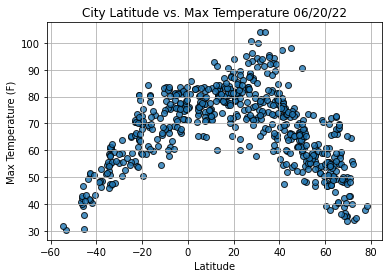

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

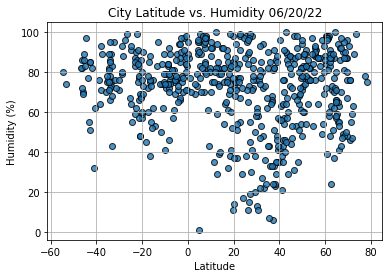

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

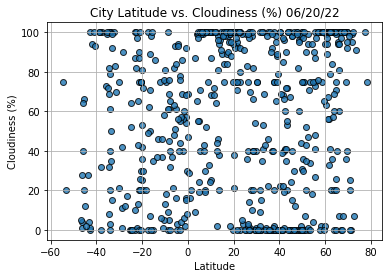

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

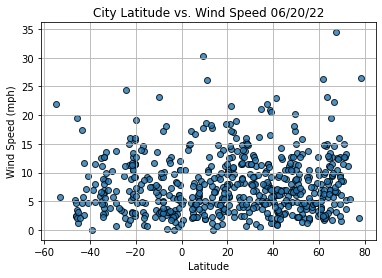

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()